# Milestone 1: Exploratory Data Analysis

**Authors**: __Khizer Zakir & Rodrigo Brust Santos__

__October 2023__

## 3. Statistical Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [7]:
# Load the dataset
file_path = '../dataset/stream_samples_cleaned.csv'
df = pd.read_csv(file_path, sep = ';')

#filtering only element columns
elements = df.iloc[:, 5:]

# Display the first few rows of the dataset
elements.head(3)

,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),Ce (ppm),Co (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,0.03,2.63,4.0,76.0,1.0,0.31,0.05,0.03,57.37,20.1,...,1.5,3.3,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,0.02,1.93,2.0,84.0,1.7,0.29,0.04,0.01,59.14,9.0,...,1.6,3.1,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,0.04,1.47,3.0,70.0,0.7,0.19,0.11,0.06,39.88,10.3,...,0.9,3.9,5.4,0.04,0.65,55,0.2,10.40,34,1.8


In [8]:
elements.describe()

,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),Ce (ppm),Co (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.068787,1.984654,5.803949,126.698166,1.354725,0.258166,0.077024,0.066248,88.580832,17.071932,...,1.864457,15.901269,11.531312,0.050804,1.431227,66.693935,0.379549,9.807955,37.609309,11.839492
std,0.295265,1.448399,4.538870,133.155984,1.537560,0.177348,0.118454,0.094204,81.914486,17.762582,...,1.743626,38.049190,14.197642,0.082466,1.341452,47.287505,0.708238,6.568492,20.887808,13.263890
min,0.010000,0.270000,1.000000,5.000000,0.100000,0.040000,0.010000,0.010000,6.130000,0.400000,...,0.300000,0.500000,0.900000,0.010000,0.210000,9.000000,0.100000,0.880000,3.000000,0.500000
25%,0.010000,1.100000,3.000000,68.000000,0.700000,0.150000,0.030000,0.030000,48.620000,7.800000,...,1.000000,4.100000,5.700000,0.010000,0.770000,38.000000,0.100000,5.640000,25.000000,4.600000
50%,0.040000,1.540000,5.000000,92.000000,1.100000,0.220000,0.060000,0.050000,68.150000,13.500000,...,1.500000,6.600000,7.600000,0.020000,1.040000,53.000000,0.200000,8.810000,34.000000,7.800000
75%,0.070000,2.370000,8.000000,137.000000,1.500000,0.320000,0.080000,0.080000,92.310000,21.100000,...,2.200000,12.700000,10.700000,0.060000,1.530000,81.000000,0.400000,12.090000,47.000000,13.100000
max,6.300000,11.090000,41.000000,1750.000000,30.500000,2.850000,1.890000,1.900000,839.050000,262.200000,...,35.200000,509.700000,120.700000,0.970000,12.020000,559.000000,12.800000,57.900000,194.000000,111.000000


In [6]:
#-- checking for NaN values
elements.isna().sum()

Ag (ppm)      0
Al (%)        0
As (ppm)      0
Ba (ppm)      0
Be (ppm)      0
Bi (ppm)      0
Ca (%)        0
Cd (ppm)      0
Ce (ppm)      0
Co (ppm)      0
Cr (ppm)      0
Cs (ppm)      0
Cu (ppm)      0
Fe (%)        0
Ga (ppm)      0
Hf (ppm)      0
Hg (ppm)      0
In (ppm)      0
K (%)         0
La (ppm)      0
Li (ppm)      0
LREE (ppm)    0
Mg (%)        0
Mn (ppm)      0
Mo (ppm)      0
Nb (ppm)      0
Ni (ppm)      0
P (ppm)       0
Pb (ppm)      0
Rb (ppm)      0
Sb (ppm)      0
Sc (ppm)      0
Sn (ppm)      0
Sr (ppm)      0
Th (ppm)      0
Ti (%)        0
U (ppm)       0
V (ppm)       0
W (ppm)       0
Y (ppm)       0
Zn (ppm)      0
Zr (ppm)      0
dtype: int64

### 3.1 Descriptive Statistical Analysis
Conduct a descriptive statistical analysis of the dataset.

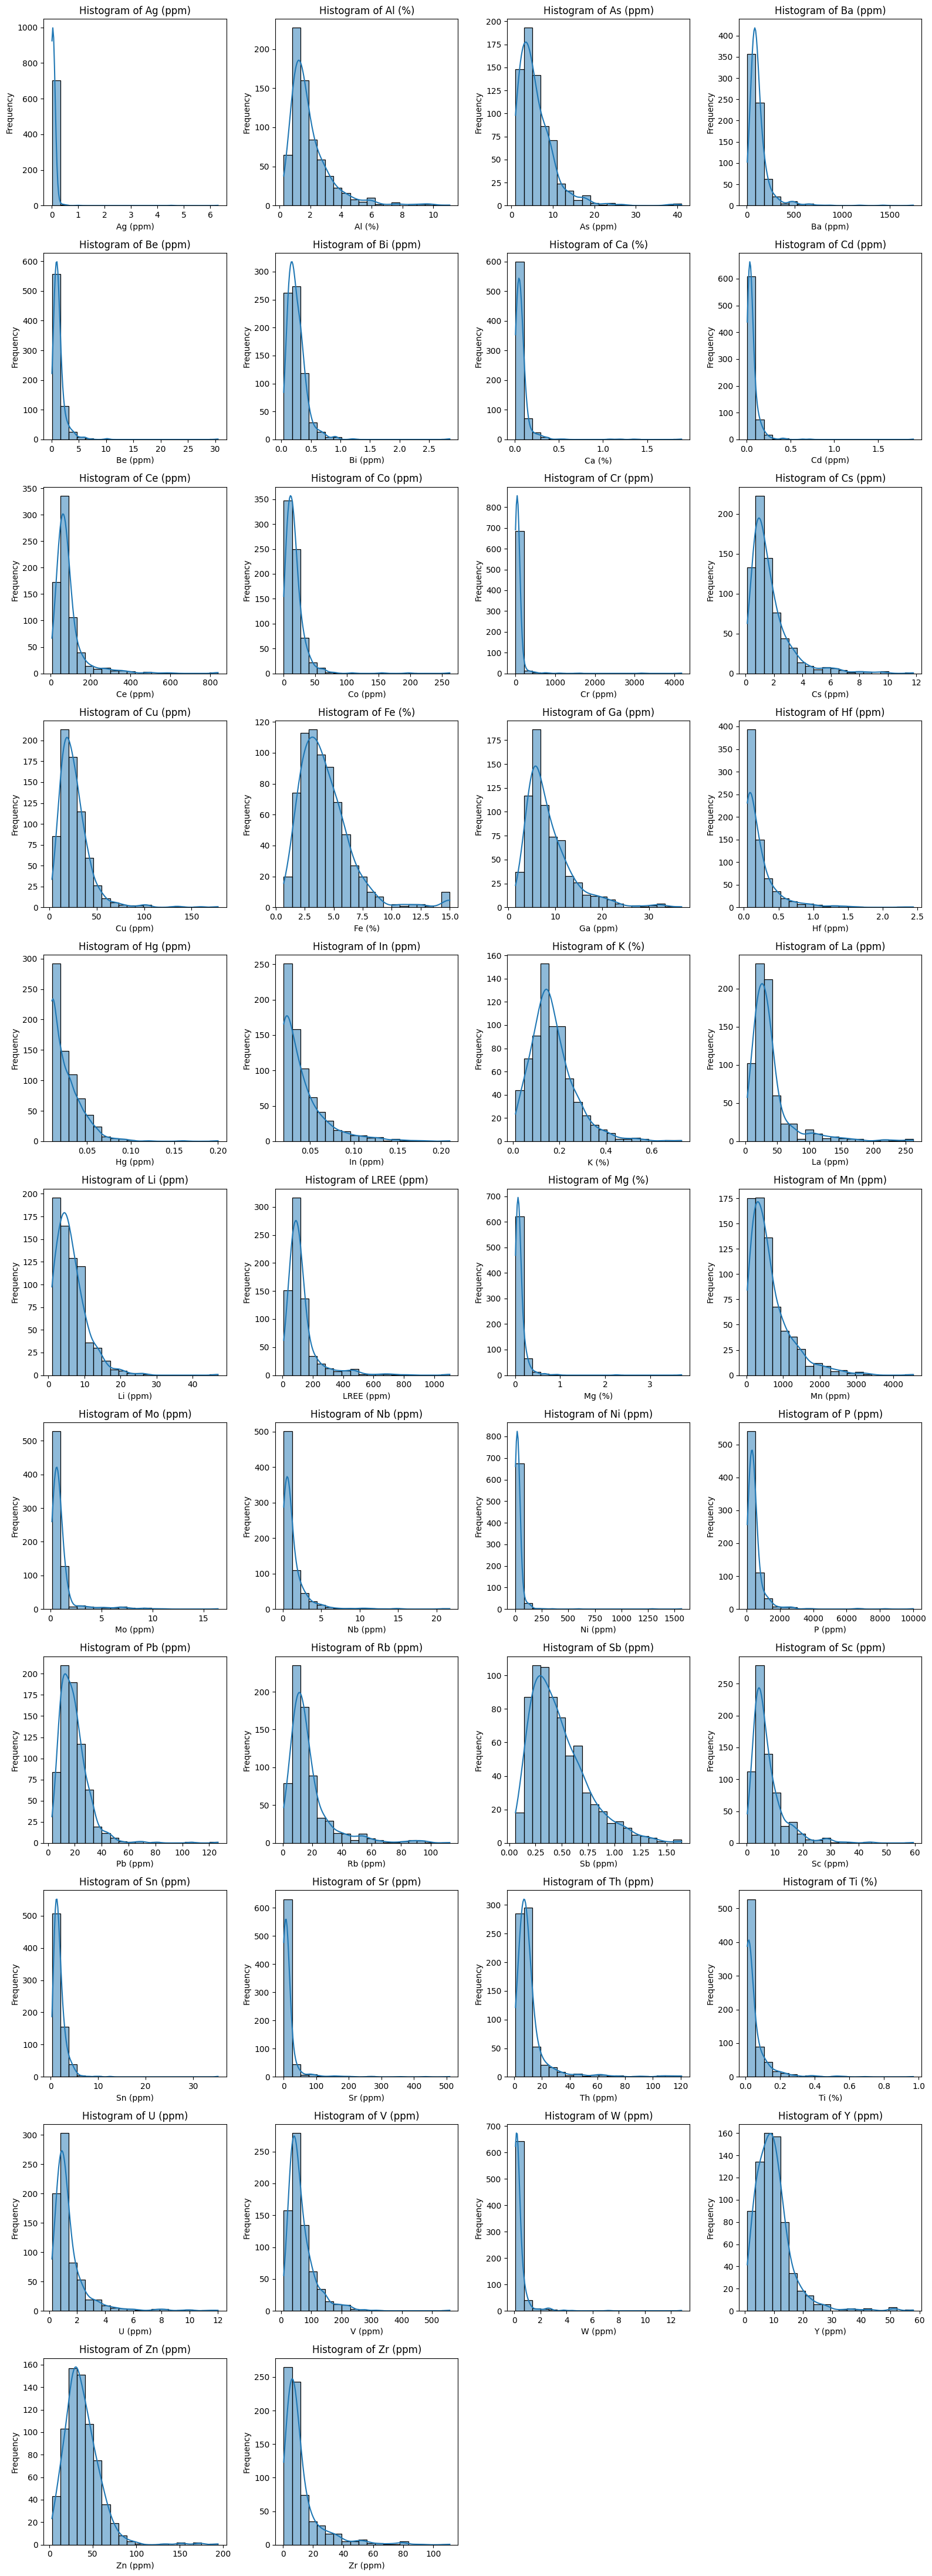

In [9]:

# Get the column names of the numeric data
num_cols = elements.columns

# Calculate the total number of plots and the number of rows needed
num_plots = len(num_cols)
num_rows = num_plots // 4 + (num_plots % 4 > 0)

# Create a grid of subplots with the appropriate number of rows and 4 columns,
# adjusting the figure size based on the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

# Iterate through numeric columns and plot histograms in subplots
for i, column in enumerate(num_cols):
    # Calculate the current row and column index
    row = i // 4
    col = i % 4

    # Plot histogram using seaborn's histplot, setting bins, KDE, and axis
    sns.histplot(elements[column], bins=20, kde=True, ax=axes[row, col])

    # Set subplot title, x-axis label, and y-axis label
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Hide empty subplots, if any, by removing them from the figure
for i in range(num_plots, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust the layout to make the subplots neatly arranged
plt.tight_layout()

# Display the figure with subplots
plt.show()



### 3.2 Correlation Analysis
Determine the potential correlation between variables and comment on its implications for machine learning.


"Determine the potential correlation between the variables" refers to analyzing the degree to which two or more variables change together. Correlation is a statistical measure that indicates the extent to which two variables tend to move in relation to each other. It can help you understand the relationships between different features in your dataset.

Here's a brief explanation:

- **Correlation Coefficient:** It is a numerical value that ranges from -1 to 1. 
  - A coefficient of 1 implies a perfect positive correlation (as one variable increases, the other also increases).
  - A coefficient of -1 implies a perfect negative correlation (as one variable increases, the other decreases).
  - A coefficient of 0 implies no correlation.

- **Correlation Matrix:** A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. You can use visualization techniques like heatmaps for a better understanding.

**Implications in Machine Learning:**

1. **Feature Selection:** Highly correlated features may not provide much additional information. In some cases, you might consider removing one of the highly correlated features to avoid multicollinearity.

2. **Model Performance:** If features are strongly correlated with the target variable, they might have a stronger impact on predicting the target variable. On the other hand, if features are highly correlated with each other, it might lead to redundancy.

3. **Assumptions of Linear Models:** Linear regression models assume that features are not highly correlated. If features are highly correlated, it can affect the interpretability of coefficients.

4. **Dimensionality Reduction:** Understanding correlation can be crucial in dimensionality reduction techniques like Principal Component Analysis (PCA). Highly correlated features might be capturing similar information, and PCA can help in reducing redundancy.

5. **Interpretability:** Correlation analysis can provide insights into the relationships between different variables, which might be valuable for understanding the problem domain.

In summary, analyzing the correlation between variables is an essential step in the data exploration process. It helps you make informed decisions about feature engineering, model selection, and overall model performance.

In [ ]:
#-- code 

### 3.3 Pre-processing
Introduce potential pre-processing steps (e.g., handling outliers, missing values, normalization).

In [ ]:
# Code for statistical analysis and pre-processing
